# Machine Learning With Python: Linear Regression With MultiVariable

importing librarys

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing data

In [48]:
path = './/data.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms','Price'])

rescaling data

In [49]:
data = (data - data.mean()) / data.std()

adding a new column called ones before the data

In [50]:
data.insert(0, 'Ones', 1)

separate X (training data) from y (target variable)

In [51]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

convert from data frames to numpy matrices

In [52]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

nitialize variables for learning rate and iterations

In [53]:
alpha = 0.01
iters = 1000

Cost Function

In [54]:
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    return np.sum(z) / (2 * len(X))

Gradient Descent Function

In [55]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
 
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost


perform gradient descent to "fit" the model parameters

In [56]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

get the cost (error) of the model

In [57]:
thiscost = computeCost(X, y, g)
print(thiscost)

0.13070336960771892


draw error graph

Text(0.5, 1.0, 'Error vs. Training Epoch')

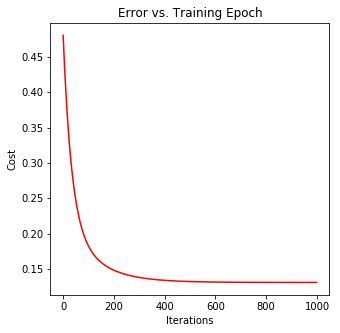

In [58]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')